In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Conv2D, Dropout, Flatten, Dense, Input
# from vis.utils import utils
from vis.visualization import visualize_cam

Using TensorFlow backend.


In [2]:
#K.set_learning_phase(0)


def create_model(data_shape):
    inpt = Input(shape=data_shape)
    x = Dropout(0.2, input_shape=data_shape)(inpt)
    x = Conv2D(64, (8, 8), strides=(2, 2),
               padding='same', activation='relu', input_shape=data_shape)(x)
    x = Conv2D((128), (6, 6), strides=(2, 2),
               padding='valid', activation='relu')(x)
    x = Conv2D((128), (5, 5), strides=(1, 1),
               padding='valid', activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inpt, x, name='can_model_mine')
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [3]:
(trX, trY), (teX, teY) = mnist.load_data()
trX = np.expand_dims(trX, axis=3)
teX = np.expand_dims(teX, axis=3)
trY = np_utils.to_categorical(trY, 10)
teY = np_utils.to_categorical(teY, 10)
model = create_model(trX.shape[1:])
model.summary()
model.fit(trX, trY, validation_split=0.21, batch_size=128, epochs=2, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        4160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         409728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

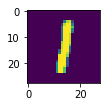

image shape = (1, 28, 28, 1)
predicted class = 1, true class = 1


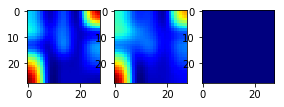

In [38]:
# plot original image
img_idx = np.random.randint(0, 47400)
img = trX[img_idx]
plt.subplot(141)
plt.imshow(img.reshape(28, 28))
plt.show()
img = np.expand_dims(img, axis=0)
print("image shape = {}".format(img.shape))

# predicted and true class
pred_class = np.argmax(model.predict(img))
#pred_class = np.argmax(trX[img_idx])
actual_class = np.argmax(trY[img_idx])
print("predicted class = {}, true class = {}".format(pred_class,
                                                         actual_class))
layer_name = 'dense_1'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]
layer_idx = 7
    
for j,modifier in enumerate([None, 'guided', 'relu']):
    heat_map = visualize_cam(model, layer_idx, pred_class, img, penultimate_layer_idx=3, backprop_modifier=modifier)
    plt.subplot(1,4,j+2)
    plt.imshow(heat_map)

plt.show()

#heatmap = visualize_cam(model, layer_idx, [pred_class], img)
#print("heatmap = {}".format(heatmap.shape))
#plt.axis('off')
#plt.imshow(heatmap.reshape(28, 28, 3))
#plt.title('Saliency map')
#plt.show()